In [1]:
#初步搭建神经网络
import numpy as np
from time import time
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [2]:
#储存模型粒度，多少个epoch存储一次
save_step = 50
#创建保存模型文件的目录
import os
model_dir = './model/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


In [3]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap = 'binary')
    plt.show()

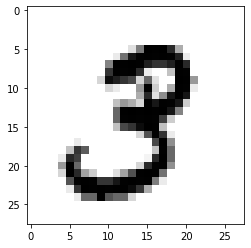

3


In [5]:
plot_image(mnist.train.images[1])
print(np.argmax(mnist.train.labels[1]))

In [6]:
#定义占用符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
#定义隐藏层神经元个数
HNN_num = 256
#定义参数
w1 = tf.Variable(tf.random_normal([784,HNN_num]))
b1 = tf.Variable(tf.zeros([HNN_num]))
Y1 = tf.nn.relu(tf.matmul(x,w1) + b1)
w2 = tf.Variable(tf.random_normal([HNN_num,10]))
b2 = tf.Variable(tf.zeros([10]))
forward = tf.matmul(Y1,w2) + b2
Y2 = tf.nn.softmax(tf.matmul(Y1,w2) + b2)


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
#定义占用符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
#定义隐藏层神经元个数
HNN_num = 256
layer_1 = tf.layers.dense(x,HNN_num)
layer_2 = tf.layers.dense(layer_1,10)
Y2 = tf.nn.softmax(layer_2)

In [17]:
#定义超参数
train_epoch = 50
learning_rate = 0.01
batch_size= 100
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 1

In [18]:
#定义交叉熵损失函数
#若采用原先的计算损失函数的办法，由于Y2会接近1使得log之后的值趋近于无穷而无法计算
# loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(Y2),reduction_indices=1))
#采用专门对交叉熵损失函数定义的新方法，注意这里输入的值是没有经过softmax处理之前的值
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer_2,labels=y))
#定义优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)


In [19]:
correct_prediction = tf.equal(tf.argmax(Y2,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [ ]:
#ckpt模型只包含variable对象序列化后的数据，不包含图结构，所以必须提供结构，而pb文件包含计算图，但变量已经固定变为常量不能继续训练
saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
startTime = time()
for epoch in range(train_epoch):
    for batch in range(batch_size):
        xs,ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict = {x:xs,y:ys})
        loss,acc = sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
    if (epoch +1)% display_step == 0:
        print('train epoch' ,(epoch+1),'loss',loss,'acc',acc)
    if (epoch +1)%save_step ==0:
        saver.save(sess,os.path.join(model_dir,'mnist_model_{:06d}.ckpt'.format(epoch+1)))
during = time()-startTime
print('finish,cost',during)

In [27]:
from tensorflow.python.framework import graph_util
saver = tf.train.Saver()
sess = tf.Session()
var_list=tf.global_variables()
sess.run(tf.global_variables_initializer())
startTime = time()
graph_def = tf.get_default_graph().as_graph_def()
for epoch in range(train_epoch):
    for batch in range(batch_size):
        xs,ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict = {x:xs,y:ys})
        loss,acc = sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
    if (epoch +1)% display_step == 0:
        print('train epoch' ,(epoch+1),'loss',loss,'acc',acc)
#     if (epoch +1)%save_step ==0:
#         saver.save(sess,os.path.join(model_dir,'mnist_model_{:06d}.ckpt'.format(epoch+1)))
# output_graph_def = graph_util.convert_variables_to_constants(
#     sess, 
#     graph_def,
#    output_node_names=[var_list[i].name for i in range(len(var_list))]
# )
# tf.train.write_graph(constant_graph, './output', 'expert-graph.pb', as_text=False)
with tf.gfile.GFile('./model/mnist_model.pb', 'wb') as fid:
    serialized_graph = output_graph_def.SerializeToString()
    fid.write(serialized_graph)
during = time()-startTime
print('finish,cost',during)

train epoch 1 loss 1.090214 acc 0.7732
train epoch 2 loss 0.7769525 acc 0.8284
train epoch 3 loss 0.6420969 acc 0.8492
train epoch 4 loss 0.5665587 acc 0.8664
train epoch 5 loss 0.51866376 acc 0.8726
train epoch 6 loss 0.48477578 acc 0.8792
train epoch 7 loss 0.4604421 acc 0.882
train epoch 8 loss 0.4408516 acc 0.8882
train epoch 9 loss 0.42430606 acc 0.8914
train epoch 10 loss 0.41120997 acc 0.8946
train epoch 11 loss 0.40017518 acc 0.8944
train epoch 12 loss 0.39051354 acc 0.894
train epoch 13 loss 0.3826254 acc 0.8988
train epoch 14 loss 0.37553203 acc 0.8992
train epoch 15 loss 0.36967352 acc 0.9
train epoch 16 loss 0.36341232 acc 0.9016
train epoch 17 loss 0.35834733 acc 0.9026
train epoch 18 loss 0.35305047 acc 0.9046
train epoch 19 loss 0.34961691 acc 0.906
train epoch 20 loss 0.3453623 acc 0.9054
train epoch 21 loss 0.34248003 acc 0.907
train epoch 22 loss 0.3381401 acc 0.9066
train epoch 23 loss 0.33518732 acc 0.908
train epoch 24 loss 0.33334956 acc 0.9092
train epoch 25 loss

AssertionError: Variable:0 is not in graph

In [21]:
#查看验证集上的准确度
acc_test = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
print(acc_test)

0.9181


In [20]:
#创建并还原模型，前提是必须得有网络结构一样的模型框架，ckpt模型的应用
saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
model = tf.train.get_checkpoint_state(model_dir)
if model and model.model_checkpoint_path:
    saver.restore(sess,model.model_checkpoint_path)

INFO:tensorflow:Restoring parameters from ./model/mnist_model_000050.ckpt


In [ ]:
#导入model
def load_model(path_to_model.pb):
    if not os.path.exists(path_to_model.pb):
        raise ValueError("'path_to_model.pb' is not exist.")

    model_graph = tf.Graph()
    with model_graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(path_to_model.pb, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return model_graph

In [ ]:
#使用model
model_graph = load_model('./xxx/xxx.pb')

inputs = model_graph.get_tensor_by_name('inputs:0')
prediction = model_graph.get_tensor_by_name('prediction:0')

with model_graph.as_default():
    with tf.Session(graph=model_graph) as sess:
      #查看验证集上的准确度
        acc_test = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print(acc_test)

In [14]:
def predict(num):
    images = mnist.test.images[num]
    plot_image(images)
    images = images.reshape(-1,784)
    result = sess.run(tf.argmax(Y2,1),feed_dict = {x : images})
    print(result)

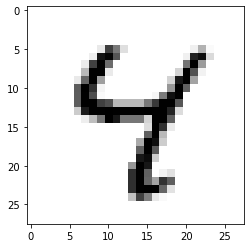

[4]


In [22]:
predict(6)

In [ ]:
compare = sess.run(tf.argmax(Y2,1),feed_dict = {x:mnist.test.images})==np.argmax(mnist.test.labels,1)
err_list = [i for i in range(len(compare)) if compare[i]==False]
# print(err_list,len(err_list))